In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.datasets import make_regression
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('./nyc_data.csv')
data.head()

,DATE,PRCP,SNOW,TMAX,TMIN,AVG_Temp
0,2000-01-01,0.0,0.0,10.0,1.1,5.55
1,2000-01-02,0.0,0.0,15.6,6.1,10.85
2,2000-01-03,0.0,0.0,17.8,10.6,14.20
3,2000-01-04,17.8,0.0,15.6,7.8,11.70
4,2000-01-05,0.0,0.0,8.3,-1.7,3.30


In [3]:
#series = pd.read_csv('newFile.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = pd.read_csv('newFile.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series

Week
2000-01-01     5.55
2000-01-01    10.85
2000-01-01    14.20
2000-01-01    11.70
2000-01-01     3.30
              ...  
2020-07-01    25.00
2020-07-01    26.10
2020-07-01    27.80
2020-07-01    23.90
2020-07-01    25.25
Name: Avg_Temp, Length: 7497, dtype: float64

In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

X = series.values
X

array([ 5.55, 10.85, 14.2 , ..., 27.8 , 23.9 , 25.25])

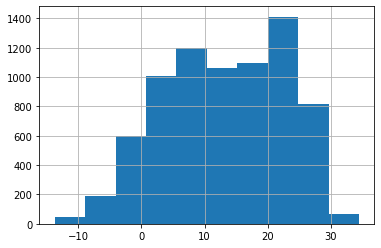

In [5]:
# Summary statistics- qual
series.hist()
plt.show()
#there is a slight bell curve-like shape- normally distributed data (mean temps areoun 10-20c)

In [6]:
# Summary statistics- quant
split = round(len(X) / 2)
X1= X[0:split]
X2= X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#means and variance of both sides of data are very similar- this indicates stationary data 
#(f looking less granular- yearly -then it would not be stationary (a single year would display trends)

mean1=12.665768, mean2=13.656095
variance1=89.302845, variance2=91.739461


In [8]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Reject null hypothesis, time series is stationary (p<0.05)')
result

ADF Statistic: -5.876661
p-value: 0.000000
Reject null hypothesis, time series is stationary (p<0.05)


(-5.876660511745281,
 3.1478572863687363e-07,
 36,
 7460,
 {'1%': -3.4312268835873154,
  '5%': -2.861927515855201,
  '10%': -2.5669762703138814},
 37456.344909973304)

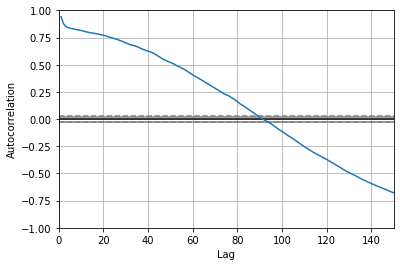

In [9]:
autocorrelation_plot(series)
plt.xlim(0,150)
plt.show()

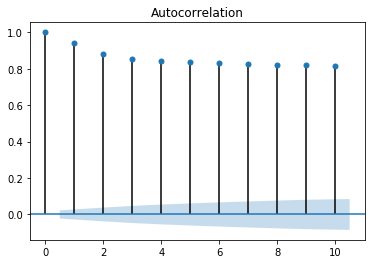

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=10)
plt.show()

AR term in ARIMA model should be AR=3


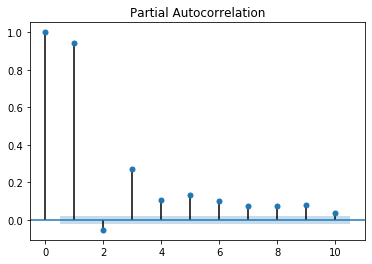

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=10)
print('AR term in ARIMA model should be AR=3')
#Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. 
#The lag at which the PACF cuts off is the indicated number of AR terms.